In [2]:
import xarray as xr
import numpy as np
import rioxarray as rio

In [4]:
test = xr.open_dataset('/mnt/seviri/aggelos_test_clouds/test_new_modis/data/geoprocessed/20240821115500_aqua.nc')

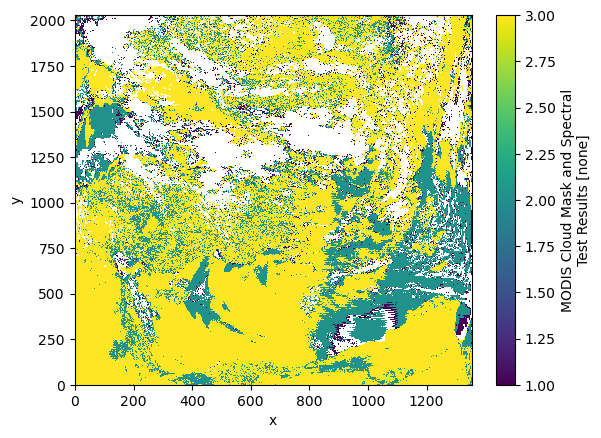

In [5]:
test.cloud_mask.plot()

In [6]:
test.longitude.data.shape#, len(test.latitude.data)

(2030, 1354)

In [7]:
test.longitude.max(), test.longitude.min(), 

(<xarray.DataArray 'longitude' ()> Size: 4B
 array(42.15756, dtype=float32),
 <xarray.DataArray 'longitude' ()> Size: 4B
 array(10.168089, dtype=float32))

In [11]:
target_lat = np.linspace(test.latitude.values.min(), test.latitude.values.max(),  2030)
target_lon = np.linspace(test.longitude.values.max(), test.longitude.values.min() , 1354)

In [12]:
coords= {
    'band': test.band_wavelength.data,
    'latitude':target_lat,
    'longitude':target_lon
}
xarray_dataarray= xr.DataArray(test.Rad.data,coords)

In [13]:
xarray_dataarray.to_netcdf('testmodis.nc')